In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_zillow
from wrangle import scale_zillow
from splitter import splitter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow()
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name
4,4,2.0,3633,296425,2005,6941.39,Los Angeles
6,3,4.0,1620,847770,2011,10244.94,Los Angeles


In [3]:
df_train, df_test, df_validate = splitter(df)
df_train.info()

Train = 56.0% | Validate = 24.0% | Test = 20.0%
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192291 entries, 1774040 to 42058
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1192291 non-null  int64  
 1   bathroomcnt                   1192291 non-null  float64
 2   calculatedfinishedsquarefeet  1192291 non-null  int64  
 3   taxvaluedollarcnt             1192291 non-null  int64  
 4   yearbuilt                     1192291 non-null  int64  
 5   taxamount                     1192291 non-null  float64
 6   fips_name                     1192291 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 72.8+ MB


## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [4]:
from scipy import stats
import sklearn.preprocessing

#### Min-Max Scaling

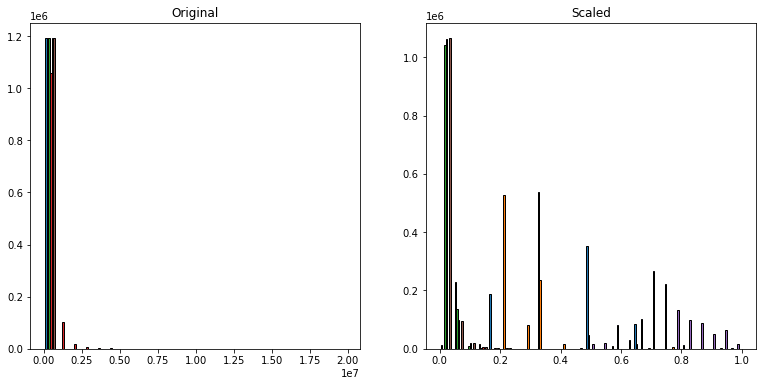

In [5]:
# Create the object
scaler_min_max = sklearn.preprocessing.MinMaxScaler()
scaler_min_max.fit(df_train.drop(columns='fips_name'))

# Fit the data
df_train_scaled_min_max = scaler_min_max.transform(df_train.drop(columns='fips_name'))
df_validate_scaled_min_max = scaler_min_max.transform(df_validate.drop(columns='fips_name'))
df_test_scaled_min_max = scaler_min_max.transform(df_test.drop(columns='fips_name'))

# Plot
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_train_scaled_min_max, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Standard Scaler

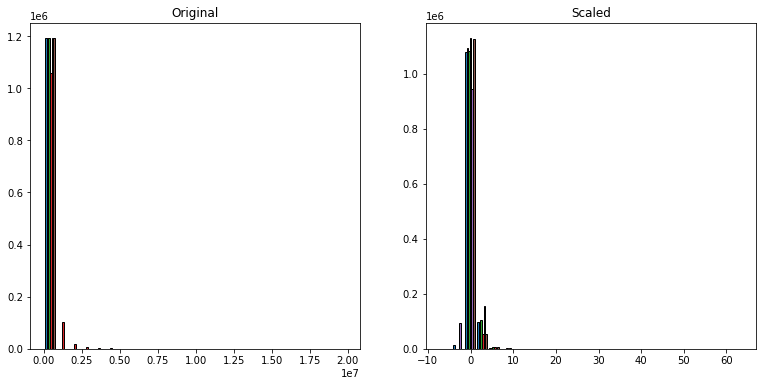

In [6]:
# Create the object
scaler_standard = sklearn.preprocessing.StandardScaler()
scaler_standard.fit(df_train.drop(columns='fips_name'))

# Fit the data
df_train_scaled_standard = scaler_standard.transform(df_train.drop(columns='fips_name'))
df_validate_scaled_standard = scaler_standard.transform(df_validate.drop(columns='fips_name'))
df_test_scaled_standard = scaler_standard.transform(df_test.drop(columns='fips_name'))

# Plot
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_train_scaled_standard, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Robust Scaler

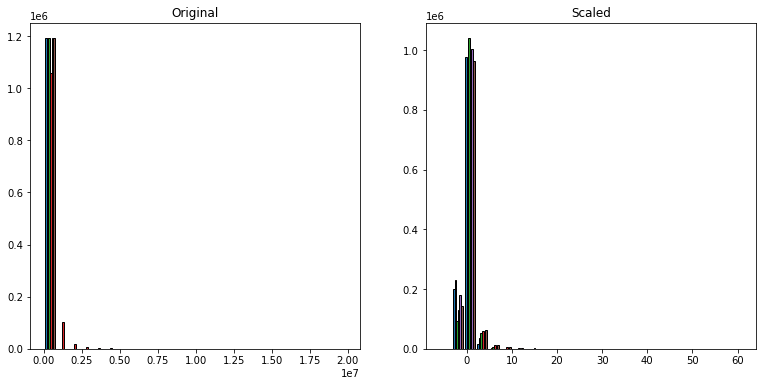

In [7]:
# Create the object
scaler_robust = sklearn.preprocessing.RobustScaler()
scaler_robust.fit(df_train.drop(columns='fips_name'))

# Fit the data
df_train_scaled_robust = scaler_robust.transform(df_train.drop(columns='fips_name'))
df_validate_scaled_robust = scaler_robust.transform(df_validate.drop(columns='fips_name'))
df_test_scaled_robust = scaler_robust.transform(df_test.drop(columns='fips_name'))

# Plot
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_train_scaled_robust, bins=25, ec='black')
plt.title('Scaled')
plt.show()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

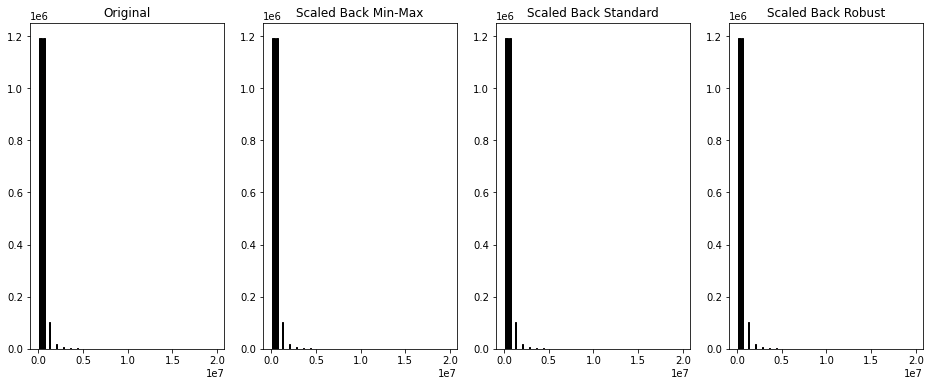

In [8]:
# Create inverse objects
min_max_scaled_back = scaler_min_max.inverse_transform(df_train_scaled_min_max)
standard_scaled_back = scaler_standard.inverse_transform(df_train_scaled_standard)
robust_scaled_back = scaler_robust.inverse_transform(df_train_scaled_robust)

# Plot
plt.figure(figsize=(16, 6))
plt.subplot(141)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(142)
plt.hist(min_max_scaled_back, bins=25, ec='black')
plt.title('Scaled Back Min-Max')
plt.subplot(143)
plt.hist(standard_scaled_back, bins=25, ec='black')
plt.title('Scaled Back Standard')
plt.subplot(144)
plt.hist(robust_scaled_back, bins=25, ec='black')
plt.title('Scaled Back Robust')
plt.show()

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

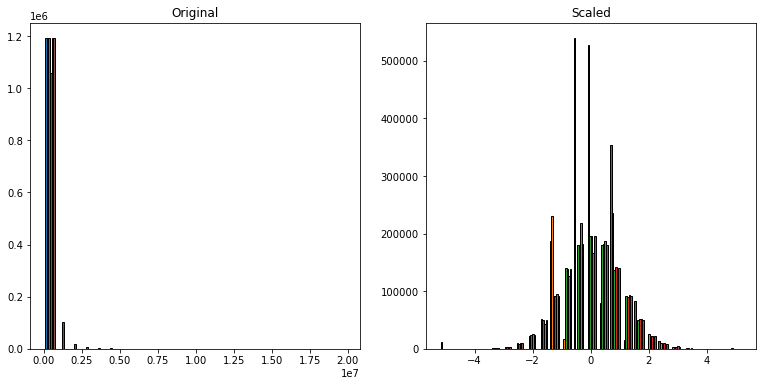

In [9]:
# Create the object
scaler_qt = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')
scaler_qt.fit(df_train.drop(columns='fips_name'))

# Fit the data
df_train_scaled_qt = scaler_qt.transform(df_train.drop(columns='fips_name'))
df_validate_scaled_qt = scaler_qt.transform(df_validate.drop(columns='fips_name'))
df_test_sscaled_qt = scaler_qt.transform(df_test.drop(columns='fips_name'))

# Plot
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_train_scaled_qt, bins=25, ec='black')
plt.title('Scaled')
plt.show()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

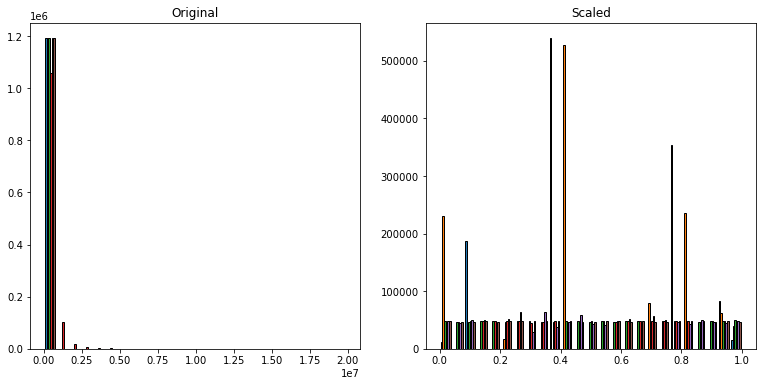

In [10]:
# Create the object
scaler_qt_uni = sklearn.preprocessing.QuantileTransformer()
scaler_qt_uni.fit(df_train.drop(columns='fips_name'))

# Fit the data
df_train_scaled_qt_uni = scaler_qt_uni.transform(df_train.drop(columns='fips_name'))
df_validate_scaled_qt_uni = scaler_qt_uni.transform(df_validate.drop(columns='fips_name'))
df_test_sscaled_qt_uni = scaler_qt_uni.transform(df_test.drop(columns='fips_name'))

# Plot
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_train.drop(columns='fips_name'), bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_train_scaled_qt_uni, bins=25, ec='black')
plt.title('Scaled')
plt.show()

It is a flatter distribution (many values uniform) with a number of peaks.  It is also scaled from 0 to 1 as opposed to normalizing around zero.

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

Looks like Min-Max is the best scaling method.  Will create a function within wrangle that performs this (will happen after data split).  Testing this:

In [11]:
df_train_scaled, df_validate_scaled, df_test_scaled = scale_zillow(df_train, df_test, df_validate)
df_train_scaled.sample(10)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name,fips_name_Los Angeles,fips_name_Orange,fips_name_Ventura
1959641,0.333333,0.214286,0.012581,0.023498,0.725581,0.021525,Ventura,0,0,1
1418550,0.333333,0.214286,0.017035,0.018320,0.734884,0.019200,Orange,0,1,0
1795649,0.833333,0.357143,0.044186,0.045697,0.813953,0.042203,Orange,0,1,0
1498591,0.666667,0.357143,0.041806,0.021973,0.906977,0.022561,Los Angeles,1,0,0
1964050,0.166667,0.071429,0.006665,0.014631,0.688372,0.016245,Los Angeles,1,0,0
1319033,0.166667,0.071429,0.010830,0.002236,0.693023,0.003992,Los Angeles,1,0,0
1627760,0.333333,0.214286,0.014672,0.010075,0.716279,0.010340,Los Angeles,1,0,0
2050127,0.333333,0.071429,0.012190,0.013289,0.679070,0.015061,Los Angeles,1,0,0
2127581,0.166667,0.071429,0.010167,0.010206,0.702326,0.010518,Los Angeles,1,0,0
139877,0.333333,0.214286,0.026454,0.010216,0.948837,0.020389,Los Angeles,1,0,0
